#### **Libraries and modules**

In [3]:
import pandas as pd

import seaborn as sns

%load_ext autoreload
%autoreload 2
import utils

#### **Data collection**

In [ ]:
# Data collection
fifa = utils.fetch_with_backoff("https://www.transfermarkt.es/statistik/weltrangliste")
pib = utils.fetch_with_backoff("https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv")

#### **Data wrangling**

In [4]:
df = utils.data_wrangling()
df.head()

,Year,Position,Country_ESP,Confederation,Points,iso3,Country_ENG,Value,Value_EUR,PBI_EUR_billions_FIFA
0,1992,1,Alemania,UEFA,57,DEU,Germany,2.131572e+12,1.982362e+12,1982.361678
1,1992,2,Italia,UEFA,57,ITA,Italy,1.320162e+12,1.227750e+12,1227.750330
2,1992,3,Brasil,CONMEBOL,56,BRA,Brazil,3.281919e+11,3.052185e+11,305.218476
3,1992,4,Suecia,UEFA,56,SWE,Sweden,2.843211e+11,2.644186e+11,264.418638
4,1992,5,Inglaterra,UEFA,55,GBR,United Kingdom,1.179660e+12,1.097083e+12,1097.083363


#### **Exploratory Data Analysis (EDA)**

##### *1. Variables description*

- **YEAR**: Year of ranking/reported, corresponding to the year of the FIFA ranking position and the country's economic value.
- **POSITION**: Country's position in the FIFA ranking (1 = best, 2 = second, etc.). Indicates relative performance in the world ranking.
- **COUNTRY_ESP**: Country's name in Spanish.
- **CONFEDERATION**: Confederation to which the country belongs (UEFA, CONMEBOL, CAF, AFC, OFC, CONCACAF). Relates the country to its football league/region.
- **POINTS**: Points obtained in the FIFA ranking for that year. Reflects the country's sporting performance.
- **ISO3**: 3-letter ISO code of the country, used for uniform identification.
- **COUNTRY_ENG**: Country's name in English.
- **VALUE**: Economic value of the country in its original currency, related to GDP or economic investment. # VALUE_EUR: Economic value converted to euros (EUR), for standardized comparisons between countries.
- **VALUE_EUR_BILLIONS**: Economic value in euros expressed in billions, to facilitate the interpretation and comparison of magnitudes.

##### *2. Summary statistics*

In [7]:
df.shape

(5541, 10)

Dataset has a total of **5541 rows** and **7 columns**.

In [3]:
# Database description for numerical values
df.describe()

,Year,Position,Points,Value,Value_EUR,PBI_EUR_billions_FIFA
count,5541.000000,5541.000000,5541.0,5.258000e+03,5.258000e+03,5541.000000
mean,2008.092222,87.748421,549.491067,3.478400e+11,3.234912e+11,326.147065
std,9.473504,50.598846,482.484003,1.492894e+12,1.388391e+12,1353.430607
min,1992.000000,1.000000,0.0,1.008070e+08,9.375051e+07,0.093751
25%,2000.000000,44.000000,126.0,6.147996e+09,5.717636e+09,6.131336
50%,2008.000000,88.000000,430.0,2.455348e+10,2.283473e+10,27.590559
75%,2016.000000,131.000000,916.0,1.603835e+11,1.491567e+11,182.533024
max,2024.000000,178.000000,1887.0,2.736094e+13,2.544567e+13,25445.669550


- **Year** column has values that goes from 1992 to 2024.
- **Position** column goes from countries ranked 1 to 178.
- **Points** column goes from 0 to 1887 and have 549.49 as its mean value.
- **Value** and **Value_EUR** are *not usable* in the analysis as they don't have the completed info.
- **PBI_EUR_billions** has a mean of 326.14€ (billions) but 75% of their values are below that mean.

In [9]:
# Summary for categorical (or object to be exact) variables 
df.describe(include=["O"])

,Country_ESP,Confederation,iso3,Country_ENG
count,5541,5541,5541,5258
unique,201,6,201,196
top,Noruega,UEFA,NOR,Costa Rica
freq,34,1551,34,33


- **Country_ENG** is *not usable* during the analysis as doesn't have all the country names completed.
- **Country_ESP** or **iso3** tell us there are 201 different countries in the dataset.
- **Confederation** tell us there are 6 six different confedetations considered: AFC (Asia), CAF (Africa), la CONCACAF (North America, Central America and the Caribbean), CONMEBOL (South America), la OFC (Oceania) and UEFA (Europe).

##### *3. Visualizations*

##### *4. Relationship between variables*

<Axes: xlabel='Position', ylabel='PBI_EUR_billions_FIFA'>

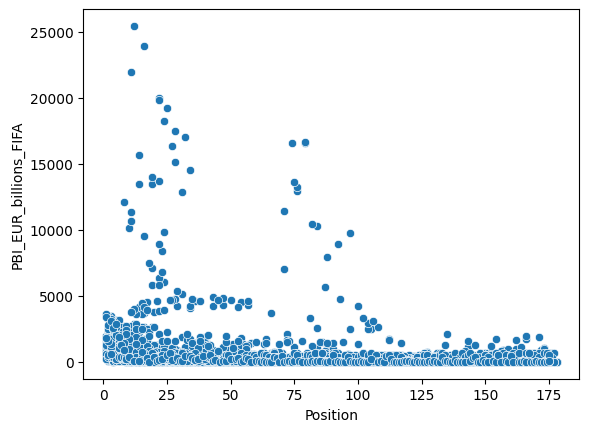

In [ ]:
# Scatter plot to visualize the relationship between Position and PBI_EUR_billions_FIFA
sns.scatterplot(x = "Position", y = "PBI_EUR_billions_FIFA", data = df)

Most of the countries (75%) have a PBI below the global mean but most of the outliers (countries that have a high PBI) have a higher position in the FIFA ranking, which suggets that a higher PBI is in someway related with a good position in the ranking.

In [ ]:
# Correlation matrix between Position and PBI_EUR_billions_FIFA
df_subset = df[['Position', 'PBI_EUR_billions_FIFA']]
corr_matrix = df_subset.corr()
corr_matrix

,Position,PBI_EUR_billions_FIFA
Position,1.000000,-0.212567
PBI_EUR_billions_FIFA,-0.212567,1.000000


There is a weak negative correlation (-0.21) between Position and PBI_EUR_billions_FIFA, indicating that as the PBI increases, the Position in the FIFA ranking worsens slightly, reflected in a higher numerical value.

<Axes: xlabel='Position', ylabel='PBI_EUR_billions_FIFA'>

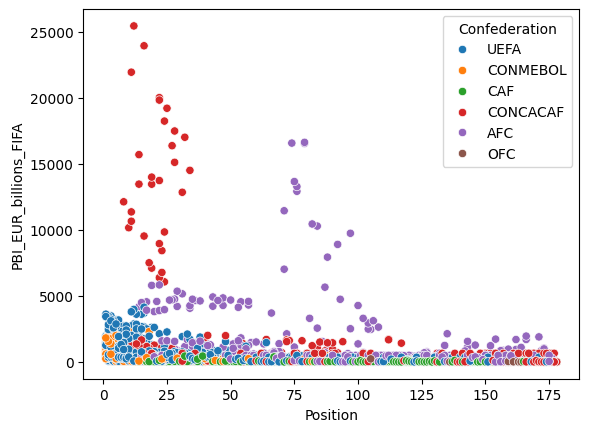

In [9]:
# Analysis of FIFA ranking and PBI by Confederation
df.groupby('Confederation')[['Position', 'PBI_EUR_billions_FIFA']].mean()
sns.scatterplot(x = "Position", y = "PBI_EUR_billions_FIFA", hue="Confederation", data = df)

<Axes: xlabel='Position', ylabel='PBI_EUR_billions_FIFA'>

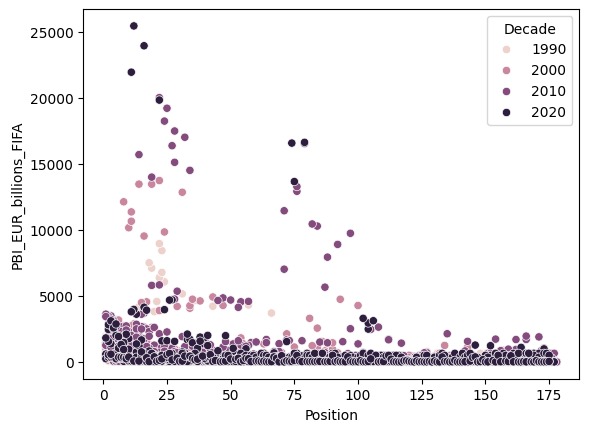

In [ ]:
# Create column to group Year into decades
df['Decade'] = (df['Year'] // 10) * 10

# Analysis of FIFA ranking and PBI by Decade
df.groupby('Decade')[['Position', 'PBI_EUR_billions_FIFA']].mean()

# Scatter plot to visualize the relationship between Position and PBI_EUR_billions_FIFA by Decade
sns.scatterplot(x = "Position", y = "PBI_EUR_billions_FIFA", hue="Decade", data = df)